In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [32]:
df=pd.read_csv("train.csv")
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [33]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [34]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


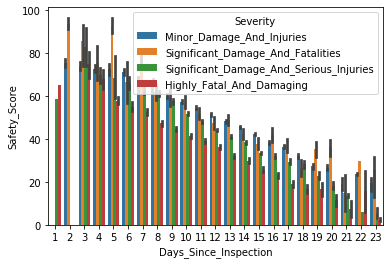

In [35]:
sns.barplot(y="Safety_Score", x="Days_Since_Inspection", hue="Severity", data=df)


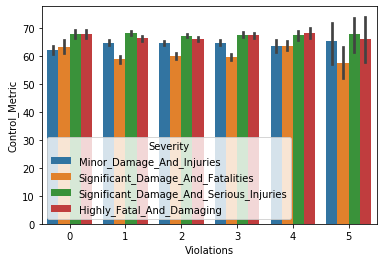

In [36]:
sns.barplot(y="Control_Metric", x="Violations", hue="Severity", data=df)

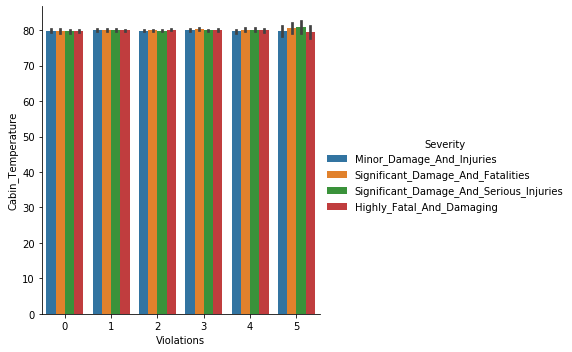

In [37]:
sns.catplot(y="Cabin_Temperature", x="Violations", hue="Severity",kind="bar", data=df)

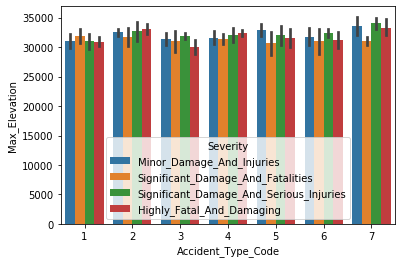

In [38]:
sns.barplot(x="Accident_Type_Code", y="Max_Elevation", hue="Severity", data=df)

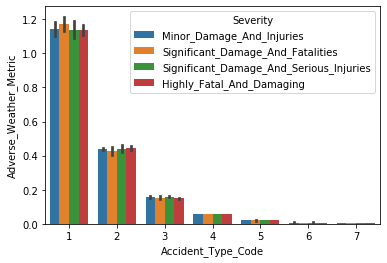

In [39]:
sns.barplot(x="Accident_Type_Code", y="Adverse_Weather_Metric", hue="Severity", data=df)

In [0]:
# d={"Highly_Fatal_And_Damaging":1,"Significant_Damage_And_Serious_Injuries":2,"Significant_Damage_And_Fatalities": 3,"Minor_Damage_And_Injuries": 4}
# df['Severity']=df['Severity'].map(d)

In [41]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [42]:
X=df.drop(['Accident_ID','Severity','Accident_Type_Code'], axis=1)
y=df['Severity']
X.head(n=5)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,31335.476824,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,26024.711057,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,39269.053927,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,42771.499200,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,35509.228515,2,0.176883


In [0]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(rescaledX,y,test_size=0.25, random_state=2)               

In [0]:
from sklearn.svm import SVC
clf2=SVC(gamma='auto')
clf2.fit(xtrain,ytrain)
ypred2=clf2.predict(xtest)

In [46]:
from sklearn.metrics import f1_score
z=100*f1_score(ytest,ypred2, average='weighted')
print(z)

61.07119786096257


In [0]:

# from sklearn.ensemble import RandomForestClassifier
# clf1=RandomForestClassifier(n_estimators=1000,n_jobs=-1,max_features='log2', random_state=1)
# clf1.fit(xtrain,ytrain)
# ypred=clf1.predict(xtest)
# #285 

In [0]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(clf1, xtrain, ytrain, cv=5)
# scores.mean()

In [0]:
# from sklearn.metrics import f1_score
# z=100*f1_score(ytest,ypred, average='weighted')
# print(z)

In [0]:
# from sklearn.model_selection import GridSearchCV
# param_grid = { 
#     'n_estimators': [1230, 1170, 1200],
#     'max_features': ['log2'],
#     'max_depth': [2, 3, 5, 10],
#     'n_jobs':[-1]
# }

# grid_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
# grid_model_result = grid_model.fit(rescaledX,y)

# # Summarize results
# best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
# print("Best: %f using %s" % (best_score, best_params))

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = { 
    'n_estimators': [1240],
    'max_features': ['log2'],
     'max_depth': [15, 10],
     'criterion': ['entropy', 'gini'],
    'n_jobs':[-1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score,average='weighted')

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(rescaledX,y)


# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_



In [52]:
best_score, best_params = grid_obj.best_score_,grid_obj.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.952300 using {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'n_estimators': 1240, 'n_jobs': -1}


In [53]:
# Fit the best algorithm to the data. 
clf.fit(xtrain, ytrain)
#Prediction
predictions = clf.predict(xtest)
print(f1_score(ytest, predictions, average='weighted'))

0.9488678396153033


In [54]:
from sklearn.model_selection import KFold

def run_kfold(clf):
    kf = KFold(n_splits=10, shuffle=True)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(rescaledX):
         fold+=1
         X_train, X_test = rescaledX[train_index], rescaledX[test_index]
         y_train, y_test = y[train_index], y[test_index]
         clf.fit(X_train, y_train)
         predictions = clf.predict(X_test)
         accuracy = f1_score(y_test, predictions,average='weighted')
         outcomes.append(accuracy)
         print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.948025330854493
Fold 2 accuracy: 0.946025209146839
Fold 3 accuracy: 0.9629749056557274
Fold 4 accuracy: 0.9500084749815437
Fold 5 accuracy: 0.9550168165167677
Fold 6 accuracy: 0.9590790681411379
Fold 7 accuracy: 0.9610140786475213
Fold 8 accuracy: 0.9410518251786332
Fold 9 accuracy: 0.9530246371736312
Fold 10 accuracy: 0.946866622005434
Mean Accuracy: 0.9523086968301728


In [55]:
df1=pd.read_csv("test.csv")
ids = df1['Accident_ID']
clf=clf.fit(rescaledX,y)
rescaledd=scaler.fit_transform(df1.drop(['Accident_ID','Accident_Type_Code'], axis=1))
predictions = clf.predict(rescaledd)
output = pd.DataFrame({ 'Accident_ID' : ids, 'Severity': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output['Severity'].value_counts()

Minor_Damage_And_Injuries                  748
Highly_Fatal_And_Damaging                  712
Significant_Damage_And_Fatalities          530
Significant_Damage_And_Serious_Injuries    510
Name: Severity, dtype: int64

In [0]:
output.to_csv('AccidentPrediction.csv', index = False)